
 <img src="https://drive.google.com/uc?id=18x0Fa9XWHlnH5OWkZ-UMrJVQCdsEmYQw" width=300/>
 
## PPGINF 528 TSRI / ICC220 TSBD - NLP [Jul/2023]
## Processamento de Linguagem Natural
#### Professores André Carvalho e Altigran da Silva
#### Aula 4 - Representação de Texto - Laboratório Word2Vec

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
 
# Leitura dos dados
TicketData=pd.read_csv('supportTicketData.csv')
 
# Número de linhas e colunas
print(TicketData.shape)
 
# 10 primeiras linhas
TicketData.head(10)

(19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2
5,annual leave hello sent last week about previo...,P2
6,report working hello dear last two weeks have ...,P2
7,more access lost access please reset password ...,P1
8,open credentials required please assist instal...,P1
9,dear please ask our supplier for price quotati...,P2


urgency
P1    6748
P2    5528
P3    7520
dtype: int64


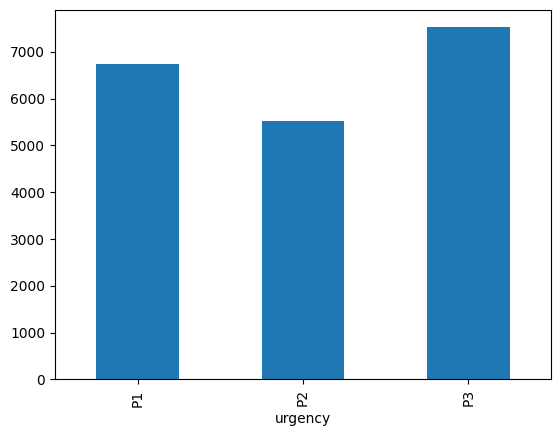

In [2]:

# Número de Tickets por nível de urgencia/prioridade
print(TicketData.groupby('urgency').size())

# Número de Tickets por nível de urgencia/prioridade - Gráfico
%matplotlib inline
TicketData.groupby('urgency').size().plot(kind='bar');


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
 
# O corpus consiste nos textos dos ticketes
# armazenados em "body"
corpus = TicketData['body'].values
 
# Criando o Vetorizador
vectorizer = CountVectorizer(stop_words='english')
 
# Gerando vetores BOW
X = vectorizer.fit_transform(corpus)

In [4]:
# Organizando os dados

CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Priority']=TicketData['urgency']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(19796, 9100)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2


In [5]:
import gensim
# Carregando os vetores de palavras word2Vec pré-treinados do Google 
pathwv = '/Users/alti/Downloads/GoogleNews-vectors-negative300.bin'
GoogleModel = gensim.models.KeyedVectors.load_word2vec_format(pathwv,binary=True,)

In [6]:
# Examplos de um dos vetores
print(GoogleModel['Manaus'].shape)
GoogleModel['Manaus'][0:10]

(300,)


array([-0.13964844, -0.20800781,  0.08154297,  0.30273438,  0.02526855,
       -0.2734375 , -0.546875  , -0.18847656, -0.10693359,  0.06933594],
      dtype=float32)

In [7]:
# most_similar(): encontrar as palavras mais similares 
# calculando o cosseno dos vetores word2vec

GoogleModel.most_similar('Manaus', topn=5)

[('Belem', 0.6231277585029602),
 ('Sao_Paulo', 0.6121501326560974),
 ('Pucallpa', 0.6105653643608093),
 ('Manaus_Brazil', 0.6048368811607361),
 ('Salvador_Bahia', 0.5963878035545349)]

In [8]:
# Verificar se existe o vetor de uma palavra
'UFAM' in GoogleModel.key_to_index.keys()

False

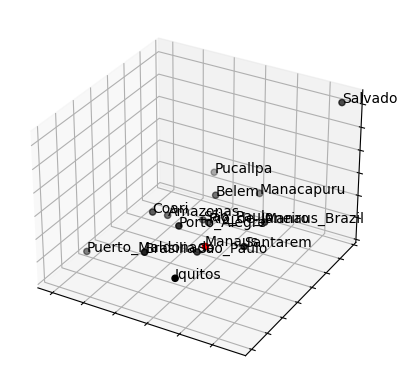

In [9]:
# Plot vizinhaça do Vetor da palavra "Manaus"
from sklearn import manifold
import matplotlib.pyplot as plt
word = "Manaus"
fig = plt.figure()
## word embedding
tot_words = [word] + [tupla[0] for tupla in 
                 GoogleModel.most_similar(word, topn=15)]
X = GoogleModel[tot_words]
## pca to reduce dimensionality from 300 to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')
X = pca.fit_transform(X)
## create dtf
dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])
dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1
## plot 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [10]:

# Criando o vocabulário (estrutura auxiliar)
WordsVocab=CountVectorizedData.columns[:-1]


In [11]:
# Essa função gera um vetor word2vec para cada sentenca do corpus 
# fazendo a soma vetorial dos vetores word2vec das palavras da sentença

def FunctionText2Vec(inpTextData):
    # Vetorizando o texto 
    X = vectorizer.transform(inpTextData)
    CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Criando um dataframe para armazendar os vetores
    W2Vec_Data=pd.DataFrame()
    
    # Itera sobre todos os vetores das setenças
    for i in range(CountVecData.shape[0]):
 
        # Inicializa o vetor das sentenças com zeros
        Sentence = np.zeros(300)
        
        # Itera sobre cada palavra da sentença. Se existe um vetor word2vec 
        # para esta palavra, soma ao vetor word2vec da sentença 

        for word in WordsVocab[CountVecData.iloc[i,:]>=1]:
            if word in GoogleModel.key_to_index.keys():    
                Sentence=Sentence+GoogleModel[word]
        # Armazena o vetor word2vec da sentença gerado 
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [12]:

# Executa a função acima para o todo corpus
W2Vec_Data=FunctionText2Vec(TicketData['body'])
 

In [13]:

# Compara a represensentação densa do Word2Vec com
# a representação esparsa do BoW
print(W2Vec_Data.shape)
print(CountVectorizedData.shape)


(19796, 300)
(19796, 9100)


In [14]:

# Preparação do Classificação
# Adiconando informação da classe ao dados
W2Vec_Data.reset_index(inplace=True, drop=True)
W2Vec_Data['Priority']=CountVectorizedData['Priority']

DataForML=W2Vec_Data
DataForML.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Priority
0,-0.027588,1.330688,0.450317,1.548401,-2.018951,0.593628,0.291443,-1.075409,1.047623,0.563599,...,0.275696,-2.055908,-0.126534,-0.493286,-0.012865,-0.446777,-0.291382,-0.463196,0.153564,P1
1,-0.367676,0.289307,0.229980,0.887024,-0.403320,0.706787,0.267822,-0.450668,0.723633,-0.143555,...,0.355835,-0.218262,-0.009521,0.271179,0.090820,-0.402100,-1.351196,-0.453003,-0.216309,P2
2,0.572418,0.511787,1.222866,3.877808,-5.053238,2.238518,3.273893,-3.496700,5.894989,3.935974,...,2.457008,-3.038437,3.946411,2.641766,1.429674,-1.167061,-5.823364,-0.957703,-0.739998,P1
3,-0.028656,-1.330383,0.718506,-0.219360,-2.338776,0.646776,1.163727,-2.480515,3.470886,1.216339,...,0.004028,-0.281616,-0.433167,1.112183,0.147133,-0.106121,-1.972126,-0.206238,-0.607529,P2
4,-0.117188,-0.082153,0.565033,0.882324,-1.381714,-0.315979,0.102051,-0.639038,0.262329,1.211182,...,0.378784,-0.455688,-0.723145,-0.123047,-0.923327,0.557278,-0.830933,0.143677,0.485840,P2


In [15]:
# Separarando Alvo (Classe) e Preditores (Dados)
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
 
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [16]:
# Separa dos dados de treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)
 
# Verifica a distribuição dos dados
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13857, 300)
(13857,)
(5939, 300)
(5939,)


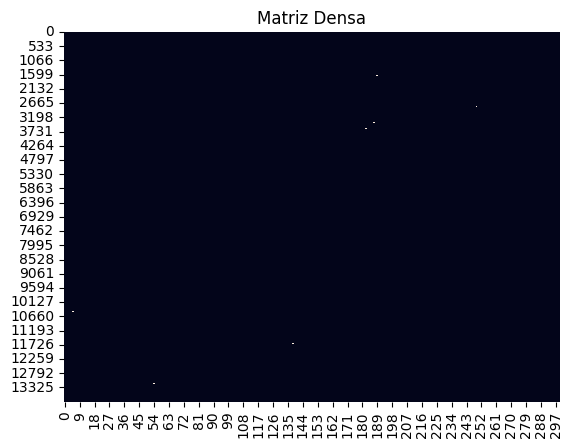

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False).set_title('Matriz Densa')
plt.show()


In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=10,penalty='l1',solver='saga')

# Treino
LOG=clf.fit(X_train,y_train)

# Teste
prediction=LOG.predict(X_test)
prediction_prob = LOG.predict_proba(X_test)

In [19]:

## Accuracy, Precision, Recall
from sklearn import metrics
accuracy = metrics.accuracy_score(prediction, y_test)
precision = metrics.precision_score(prediction, y_test,average='macro')
recall = metrics.recall_score(prediction, y_test,average='macro')
f1 = metrics.f1_score(prediction, y_test,average='macro')
auc = metrics.roc_auc_score(y_test, prediction_prob,multi_class="ovr")

print("Accuracy:",  round(accuracy,2))
print("Precision:",  round(precision,2))
print("Recall:",  round(recall,2))
print("F1:",  round(f1,2))
print("Auc:", round(auc,2))

Accuracy: 0.71
Precision: 0.68
Recall: 0.68
F1: 0.68
Auc: 0.87


In [20]:
# Metricas por classe
pc_metrics = metrics.precision_recall_fscore_support(prediction, y_test,average=None)
per_class_metrics = pd.DataFrame(pc_metrics,index=['Precison', 'Recall', 'F1','Sup']).drop(['Sup'])
per_class_metrics

,0,1,2
Precison,0.702757,0.392535,0.952256
Recall,0.621179,0.568935,0.857256
F1,0.659454,0.464553,0.902262


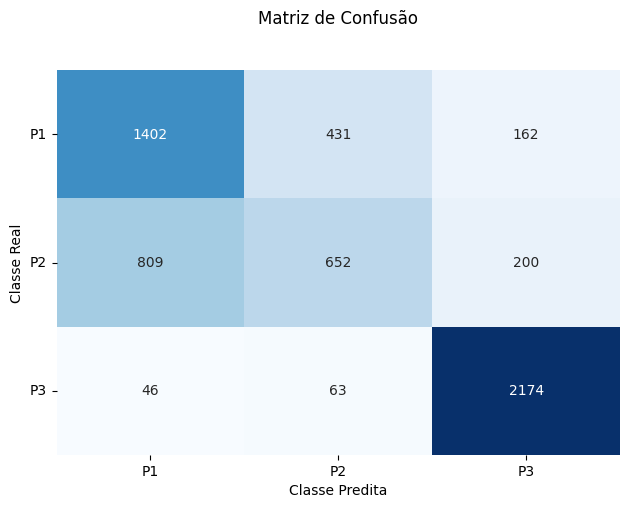

In [21]:
## Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

classes = np.unique(y_test)
cm = metrics.confusion_matrix(y_test,prediction,)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)
plt.tight_layout()
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.show()

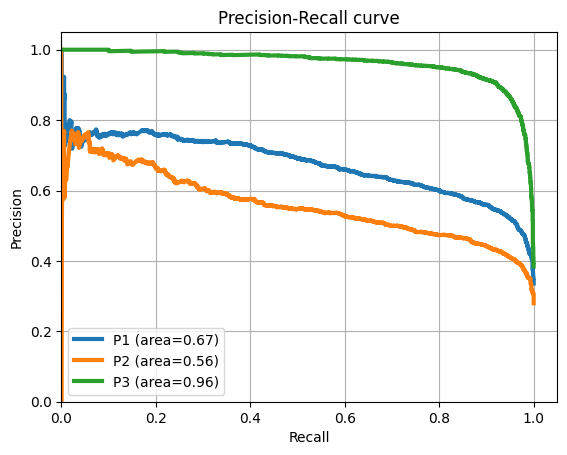

In [22]:
## Plot precision-recall curve
fig, ax = plt.subplots()    
y_test_array = pd.get_dummies(y_test, drop_first=False).values
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], prediction_prob[:,i])
    ax.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax.set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax.legend(loc="best")
ax.grid(True)
plt.show()

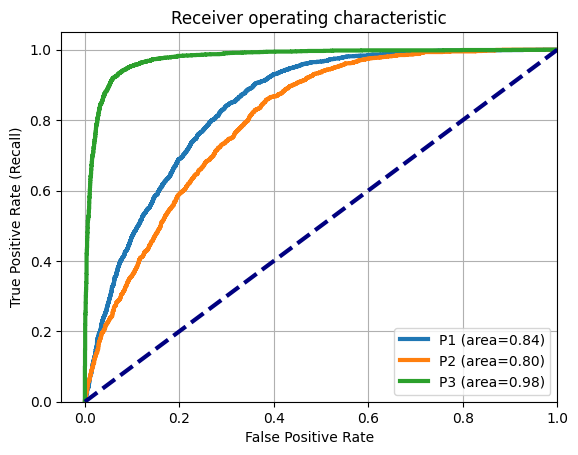

In [23]:
## Plot roc
fig, ax = plt.subplots()
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           prediction_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)